In [1]:
!pip install --user tensorflow matplotlib librosa scipy keras pandas tqdm


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
import shutil
berlin_directory_list = os.listdir("Dataset/download/wav")

file_emotion = []
file_path = []

for file in berlin_directory_list:
#     file_path.append(Berlin + file)
    print(f"Dataset/download/wav/{file}")
    ele = file[5]
    if ele=='W':
        shutil.move(f"Dataset/download/wav/{file}" , "Dataset/Anger/"+file)
#         file_emotion.append('angry')
    elif ele=='F':
#         file_emotion.append('happy')
        shutil.move(f"Dataset/download/wav/{file}" , "Dataset/Happiness/"+file)
    elif ele=='L'or ele=='T':
#         file_emotion.append('sad')
        shutil.move(f"Dataset/download/wav/{file}" , "Dataset/Sadness/"+file)
        
# dataframe for emotion of files
# emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
# path_df = pd.DataFrame(file_path, columns=['Path'])
# Berlin_df = pd.concat([emotion_df, path_df], axis=1)
# Berlin_df.head(10)


Dataset/download/wav/03a01Fa.wav
Dataset/download/wav/03a01Nc.wav
Dataset/download/wav/03a01Wa.wav
Dataset/download/wav/03a02Fc.wav
Dataset/download/wav/03a02Nc.wav
Dataset/download/wav/03a02Ta.wav
Dataset/download/wav/03a02Wb.wav
Dataset/download/wav/03a02Wc.wav
Dataset/download/wav/03a04Ad.wav
Dataset/download/wav/03a04Fd.wav
Dataset/download/wav/03a04Lc.wav
Dataset/download/wav/03a04Nc.wav
Dataset/download/wav/03a04Ta.wav
Dataset/download/wav/03a04Wc.wav
Dataset/download/wav/03a05Aa.wav
Dataset/download/wav/03a05Fc.wav
Dataset/download/wav/03a05Nd.wav
Dataset/download/wav/03a05Tc.wav
Dataset/download/wav/03a05Wa.wav
Dataset/download/wav/03a05Wb.wav
Dataset/download/wav/03a07Fa.wav
Dataset/download/wav/03a07Fb.wav
Dataset/download/wav/03a07La.wav
Dataset/download/wav/03a07Nc.wav
Dataset/download/wav/03a07Wc.wav
Dataset/download/wav/03b01Fa.wav
Dataset/download/wav/03b01Lb.wav
Dataset/download/wav/03b01Nb.wav
Dataset/download/wav/03b01Td.wav
Dataset/download/wav/03b01Wa.wav
Dataset/do

Dataset/download/wav/14b09Lb.wav
Dataset/download/wav/14b09Td.wav
Dataset/download/wav/14b09Wa.wav
Dataset/download/wav/14b09Wc.wav
Dataset/download/wav/14b10Ad.wav
Dataset/download/wav/14b10Eb.wav
Dataset/download/wav/14b10Lb.wav
Dataset/download/wav/14b10Nb.wav
Dataset/download/wav/14b10Tc.wav
Dataset/download/wav/14b10Wc.wav
Dataset/download/wav/15a01Ea.wav
Dataset/download/wav/15a01Fb.wav
Dataset/download/wav/15a01La.wav
Dataset/download/wav/15a01Nb.wav
Dataset/download/wav/15a01Wa.wav
Dataset/download/wav/15a02Ac.wav
Dataset/download/wav/15a02Ea.wav
Dataset/download/wav/15a02La.wav
Dataset/download/wav/15a02Na.wav
Dataset/download/wav/15a02Ta.wav
Dataset/download/wav/15a02Wb.wav
Dataset/download/wav/15a02Wd.wav
Dataset/download/wav/15a04Ab.wav
Dataset/download/wav/15a04Ac.wav
Dataset/download/wav/15a04Fd.wav
Dataset/download/wav/15a04Nc.wav
Dataset/download/wav/15a04Wa.wav
Dataset/download/wav/15a04Wb.wav
Dataset/download/wav/15a05Eb.wav
Dataset/download/wav/15a05Fb.wav
Dataset/do

In [2]:
import pandas as pd
import os
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
%matplotlib inline

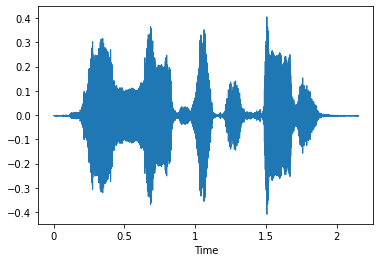

In [3]:
file_name='dataset/Anger/1-139.wav'

audio_data, sampling_rate = librosa.load(file_name)
librosa.display.waveshow(audio_data,sr=sampling_rate)
ipd.Audio(file_name)

In [4]:
audio_data

array([0.00026331, 0.0003648 , 0.00025589, ..., 0.00034286, 0.00032418,
       0.        ], dtype=float32)

In [5]:
sampling_rate

22050

In [6]:
import csv
fieldHeader = ['filename', 'classNum', 'className']

individualField = []

fields = []

int2emotion = {
    "1": "Anger",
    "2": "Happiness",
    "3": "Sadness"
}

for file in glob.glob("dataset/*/*.wav"):
        basename = os.path.basename(file)        
        emotionNum = basename.split("-")[0]
        emotion = int2emotion[emotionNum]
        
        individualField.append(basename)
        individualField.append(emotionNum)
        individualField.append(emotion)
        
        fields.append(individualField)
        individualField = []


with open("data.csv", 'w') as csvfile:
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)

    # writing the fields 
    csvwriter.writerow(fieldHeader) 

    # writing the data rows 
    csvwriter.writerows(fields)

In [7]:
audio_dataset_path='Dataset/'
metadata=pd.read_csv('data.csv')
metadata.last

<bound method NDFrame.last of        filename  classNum className
0       1-1.wav         1     Anger
1      1-10.wav         1     Anger
2     1-100.wav         1     Anger
3     1-101.wav         1     Anger
4     1-102.wav         1     Anger
...         ...       ...       ...
1272   3-95.wav         3   Sadness
1273   3-96.wav         3   Sadness
1274   3-97.wav         3   Sadness
1275   3-98.wav         3   Sadness
1276   3-99.wav         3   Sadness

[1277 rows x 3 columns]>

In [8]:
metadata['className'].value_counts()

Sadness      455
Anger        439
Happiness    383
Name: className, dtype: int64

In [9]:
metadata.shape

(1277, 3)

In [10]:
mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)

In [11]:
mfccs

array([[-6.2834729e+02, -6.2686230e+02, -6.2667938e+02, ...,
        -6.2800665e+02, -6.2791168e+02, -6.2747760e+02],
       [ 1.3620462e+01,  1.5350602e+01,  1.6196016e+01, ...,
         1.4449054e+01,  1.4605480e+01,  1.5218949e+01],
       [ 1.2513202e+01,  1.3466948e+01,  1.5611368e+01, ...,
         1.4221203e+01,  1.4442938e+01,  1.5055609e+01],
       ...,
       [ 2.1918136e-01,  1.7367375e+00, -2.0848823e-01, ...,
        -7.6746380e-01, -5.1592255e-01, -3.6997452e-01],
       [ 6.6196185e-01,  1.7454140e+00,  1.3830397e-01, ...,
        -7.4898589e-01, -3.1110108e-01, -1.2029286e-01],
       [ 9.5563006e-01,  1.4221413e+00,  3.7041575e-01, ...,
        -7.2769278e-01, -1.0193521e-01,  1.4850625e-01]], dtype=float32)

In [12]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [13]:
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
#     file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["filename"]))
    file_name = "Dataset/"+row['className']+"/"+row['filename']
    final_class_labels=row["className"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

1277it [00:54, 23.37it/s]


In [14]:
%pip install openpyxl

  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
extracted_features

[[array([-2.3525876e+02,  9.7263557e+01, -6.9098846e+01,  3.8219662e+01,
         -2.3175690e+01,  9.7032499e+00, -1.4446387e+01, -8.7337055e+00,
         -1.0213528e+01, -9.2752600e+00,  4.1270862e+00, -1.2478044e+01,
          3.4759476e+00, -8.4596176e+00,  1.9365813e+00, -4.5638843e+00,
         -6.4839349e+00, -5.6250417e-01, -8.1321316e+00, -3.5215650e+00,
         -5.1710734e+00,  6.5240180e-01, -6.4594989e+00, -2.3634722e-02,
          1.3573705e+00, -1.5840259e+00,  2.5797715e+00, -1.9683474e+00,
          8.0246681e-01,  2.4959357e+00,  5.3652387e+00,  5.7908130e-01,
          5.9493583e-01,  1.0218205e+00,  2.0617212e-01,  3.8110981e+00,
          2.0360956e+00,  3.3448653e+00,  9.7372627e-01, -4.2434743e-01],
        dtype=float32),
  'Anger'],
 [array([-252.42154   ,  108.92264   ,  -44.598278  ,   39.625465  ,
          -30.308432  ,    7.477504  ,  -10.804537  ,   -4.057833  ,
          -14.97913   ,  -11.276303  ,    5.098713  ,  -11.341038  ,
            2.5134475 ,  -

In [16]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.to_csv("features_data.csv")

In [17]:
# extracted_features_df = pd.read_csv("features_data.csv", usecols=['feature','class'])
# extracted_features_df.head(10)

In [18]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [19]:
X.shape

(1277, 40)

In [20]:
y

array(['Anger', 'Anger', 'Anger', ..., 'Sadness', 'Sadness', 'Sadness'],
      dtype='<U9')

In [21]:
y.shape

(1277,)

In [22]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [23]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [24]:
y.shape

(1277, 3)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras import layers


In [28]:
num_labels=y.shape[1]

In [68]:
model=Sequential()
initializer = tf.keras.initializers.Orthogonal()

###first layer
model.add(Dense(64,input_shape=(40,)))
model.add(Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.2))

###second layer
model.add(Dense(128, kernel_initializer=initializer))
model.add(Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.3))

###third layer
model.add(Dense(256, kernel_initializer=initializer))
model.add(Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.3))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [69]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                2624      
                                                                 
 activation_16 (Activation)  (None, 64)                0         
                                                                 
 batch_normalization_12 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 128)               8320      
                                                                 
 activation_17 (Activation)  (None, 128)               0         
                                                      

In [70]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [71]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 1000
num_batch_size = 512

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=0, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/1000
2/2 [==============================] - 1s 203ms/step - loss: 1.7396 - accuracy: 0.3418 - val_loss: 2.0951 - val_accuracy: 0.3672
Epoch 2/1000
2/2 [==============================] - 0s 28ms/step - loss: 1.1689 - accuracy: 0.5279 - val_loss: 4.6333 - val_accuracy: 0.3672
Epoch 3/1000
2/2 [==============================] - 0s 28ms/step - loss: 1.0016 - accuracy: 0.5798 - val_loss: 5.5140 - val_accuracy: 0.3672
Epoch 4/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.9008 - accuracy: 0.6533 - val_loss: 5.4831 - val_accuracy: 0.3672
Epoch 5/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.8511 - accuracy: 0.6582 - val_loss: 5.0007 - val_accuracy: 0.3672
Epoch 6/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.8172 - accuracy: 0.6954 - val_loss: 4.5236 - val_accuracy: 0.3672
Epoch 7/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.7776 - accuracy: 0.7248 - val_loss: 4.0967 - val_accuracy: 0.3672
Epoch 8/1000

Epoch 59/1000
2/2 [==============================] - 0s 65ms/step - loss: 0.3151 - accuracy: 0.8717 - val_loss: 0.9384 - val_accuracy: 0.5469
Epoch 60/1000
2/2 [==============================] - 0s 64ms/step - loss: 0.3386 - accuracy: 0.8629 - val_loss: 0.9283 - val_accuracy: 0.5547
Epoch 61/1000
2/2 [==============================] - 0s 65ms/step - loss: 0.3043 - accuracy: 0.8746 - val_loss: 0.9237 - val_accuracy: 0.5625
Epoch 62/1000
2/2 [==============================] - 0s 66ms/step - loss: 0.3306 - accuracy: 0.8648 - val_loss: 0.9019 - val_accuracy: 0.5703
Epoch 63/1000
2/2 [==============================] - 0s 74ms/step - loss: 0.3102 - accuracy: 0.8825 - val_loss: 0.8757 - val_accuracy: 0.5781
Epoch 64/1000
2/2 [==============================] - 0s 62ms/step - loss: 0.3117 - accuracy: 0.8697 - val_loss: 0.8489 - val_accuracy: 0.5938
Epoch 65/1000
2/2 [==============================] - 0s 62ms/step - loss: 0.3135 - accuracy: 0.8786 - val_loss: 0.8097 - val_accuracy: 0.6094
Epoch 

2/2 [==============================] - 0s 73ms/step - loss: 0.1883 - accuracy: 0.9295 - val_loss: 0.2864 - val_accuracy: 0.9180
Epoch 117/1000
2/2 [==============================] - 0s 63ms/step - loss: 0.2197 - accuracy: 0.9138 - val_loss: 0.2841 - val_accuracy: 0.9180
Epoch 118/1000
2/2 [==============================] - 0s 63ms/step - loss: 0.2059 - accuracy: 0.9246 - val_loss: 0.2841 - val_accuracy: 0.9023
Epoch 119/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.2184 - accuracy: 0.9197 - val_loss: 0.2878 - val_accuracy: 0.8789
Epoch 120/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.2089 - accuracy: 0.9099 - val_loss: 0.3027 - val_accuracy: 0.8711
Epoch 121/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.1890 - accuracy: 0.9265 - val_loss: 0.3235 - val_accuracy: 0.8594
Epoch 122/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.1792 - accuracy: 0.9285 - val_loss: 0.3505 - val_accuracy: 0.8398
Epoch 123/1000

2/2 [==============================] - 0s 25ms/step - loss: 0.1556 - accuracy: 0.9383 - val_loss: 0.4698 - val_accuracy: 0.8359
Epoch 174/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.1361 - accuracy: 0.9393 - val_loss: 0.4631 - val_accuracy: 0.8516
Epoch 175/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.1624 - accuracy: 0.9412 - val_loss: 0.4596 - val_accuracy: 0.8555
Epoch 176/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.1527 - accuracy: 0.9500 - val_loss: 0.4655 - val_accuracy: 0.8516
Epoch 177/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.1223 - accuracy: 0.9549 - val_loss: 0.4600 - val_accuracy: 0.8516
Epoch 178/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.1433 - accuracy: 0.9481 - val_loss: 0.4503 - val_accuracy: 0.8633
Epoch 179/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.1421 - accuracy: 0.9432 - val_loss: 0.4320 - val_accuracy: 0.8672
Epoch 180/1000

2/2 [==============================] - 0s 23ms/step - loss: 0.1106 - accuracy: 0.9598 - val_loss: 0.4657 - val_accuracy: 0.8594
Epoch 231/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.1058 - accuracy: 0.9589 - val_loss: 0.4642 - val_accuracy: 0.8594
Epoch 232/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.1110 - accuracy: 0.9618 - val_loss: 0.4542 - val_accuracy: 0.8594
Epoch 233/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.1064 - accuracy: 0.9569 - val_loss: 0.4356 - val_accuracy: 0.8594
Epoch 234/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.1123 - accuracy: 0.9540 - val_loss: 0.4395 - val_accuracy: 0.8711
Epoch 235/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.1135 - accuracy: 0.9540 - val_loss: 0.4538 - val_accuracy: 0.8633
Epoch 236/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.1381 - accuracy: 0.9442 - val_loss: 0.4311 - val_accuracy: 0.8672
Epoch 237/1000

2/2 [==============================] - 0s 24ms/step - loss: 0.0860 - accuracy: 0.9677 - val_loss: 0.3827 - val_accuracy: 0.8828
Epoch 288/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0943 - accuracy: 0.9647 - val_loss: 0.3854 - val_accuracy: 0.8906
Epoch 289/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0847 - accuracy: 0.9677 - val_loss: 0.4069 - val_accuracy: 0.8750
Epoch 290/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0996 - accuracy: 0.9628 - val_loss: 0.4520 - val_accuracy: 0.8633
Epoch 291/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.1103 - accuracy: 0.9559 - val_loss: 0.4908 - val_accuracy: 0.8555
Epoch 292/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.0969 - accuracy: 0.9677 - val_loss: 0.5104 - val_accuracy: 0.8438
Epoch 293/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0821 - accuracy: 0.9696 - val_loss: 0.5211 - val_accuracy: 0.8359
Epoch 294/1000

2/2 [==============================] - 0s 23ms/step - loss: 0.0730 - accuracy: 0.9726 - val_loss: 0.2439 - val_accuracy: 0.9102
Epoch 345/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0760 - accuracy: 0.9647 - val_loss: 0.2587 - val_accuracy: 0.9102
Epoch 346/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0677 - accuracy: 0.9755 - val_loss: 0.2785 - val_accuracy: 0.8945
Epoch 347/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0657 - accuracy: 0.9745 - val_loss: 0.3039 - val_accuracy: 0.8906
Epoch 348/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0552 - accuracy: 0.9785 - val_loss: 0.3326 - val_accuracy: 0.8867
Epoch 349/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0712 - accuracy: 0.9726 - val_loss: 0.3359 - val_accuracy: 0.8867
Epoch 350/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0732 - accuracy: 0.9716 - val_loss: 0.3071 - val_accuracy: 0.9062
Epoch 351/1000

2/2 [==============================] - 0s 26ms/step - loss: 0.0602 - accuracy: 0.9785 - val_loss: 0.3396 - val_accuracy: 0.9102
Epoch 402/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0558 - accuracy: 0.9804 - val_loss: 0.3294 - val_accuracy: 0.9141
Epoch 403/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0630 - accuracy: 0.9706 - val_loss: 0.3148 - val_accuracy: 0.9141
Epoch 404/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0743 - accuracy: 0.9726 - val_loss: 0.3065 - val_accuracy: 0.9102
Epoch 405/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0523 - accuracy: 0.9833 - val_loss: 0.3091 - val_accuracy: 0.9102
Epoch 406/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0584 - accuracy: 0.9804 - val_loss: 0.3266 - val_accuracy: 0.8945
Epoch 407/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0502 - accuracy: 0.9814 - val_loss: 0.3325 - val_accuracy: 0.8984
Epoch 408/1000

2/2 [==============================] - 0s 26ms/step - loss: 0.0637 - accuracy: 0.9775 - val_loss: 0.2437 - val_accuracy: 0.9336
Epoch 459/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0454 - accuracy: 0.9882 - val_loss: 0.2376 - val_accuracy: 0.9375
Epoch 460/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0577 - accuracy: 0.9785 - val_loss: 0.2353 - val_accuracy: 0.9375
Epoch 461/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0621 - accuracy: 0.9726 - val_loss: 0.2442 - val_accuracy: 0.9297
Epoch 462/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0519 - accuracy: 0.9794 - val_loss: 0.2588 - val_accuracy: 0.9141
Epoch 463/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0558 - accuracy: 0.9824 - val_loss: 0.2756 - val_accuracy: 0.9062
Epoch 464/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0531 - accuracy: 0.9794 - val_loss: 0.2848 - val_accuracy: 0.9102
Epoch 465/1000

2/2 [==============================] - 0s 23ms/step - loss: 0.0356 - accuracy: 0.9892 - val_loss: 0.2386 - val_accuracy: 0.9375
Epoch 516/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0448 - accuracy: 0.9833 - val_loss: 0.2348 - val_accuracy: 0.9453
Epoch 517/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0450 - accuracy: 0.9794 - val_loss: 0.2389 - val_accuracy: 0.9414
Epoch 518/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0444 - accuracy: 0.9775 - val_loss: 0.2478 - val_accuracy: 0.9297
Epoch 519/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0562 - accuracy: 0.9775 - val_loss: 0.2523 - val_accuracy: 0.9375
Epoch 520/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0415 - accuracy: 0.9853 - val_loss: 0.2426 - val_accuracy: 0.9375
Epoch 521/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0423 - accuracy: 0.9873 - val_loss: 0.2255 - val_accuracy: 0.9375
Epoch 522/1000

2/2 [==============================] - 0s 26ms/step - loss: 0.0393 - accuracy: 0.9863 - val_loss: 0.2064 - val_accuracy: 0.9492
Epoch 573/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0349 - accuracy: 0.9882 - val_loss: 0.2118 - val_accuracy: 0.9492
Epoch 574/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0475 - accuracy: 0.9824 - val_loss: 0.2152 - val_accuracy: 0.9492
Epoch 575/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.2174 - val_accuracy: 0.9414
Epoch 576/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0359 - accuracy: 0.9873 - val_loss: 0.2218 - val_accuracy: 0.9414
Epoch 577/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0388 - accuracy: 0.9833 - val_loss: 0.2261 - val_accuracy: 0.9453
Epoch 578/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0432 - accuracy: 0.9814 - val_loss: 0.2307 - val_accuracy: 0.9336
Epoch 579/1000

2/2 [==============================] - 0s 23ms/step - loss: 0.0429 - accuracy: 0.9843 - val_loss: 0.2792 - val_accuracy: 0.9297
Epoch 630/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.0391 - accuracy: 0.9843 - val_loss: 0.2587 - val_accuracy: 0.9297
Epoch 631/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0306 - accuracy: 0.9853 - val_loss: 0.2449 - val_accuracy: 0.9336
Epoch 632/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0336 - accuracy: 0.9873 - val_loss: 0.2353 - val_accuracy: 0.9336
Epoch 633/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0303 - accuracy: 0.9902 - val_loss: 0.2334 - val_accuracy: 0.9336
Epoch 634/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0332 - accuracy: 0.9892 - val_loss: 0.2363 - val_accuracy: 0.9297
Epoch 635/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0231 - accuracy: 0.9922 - val_loss: 0.2373 - val_accuracy: 0.9336
Epoch 636/1000

2/2 [==============================] - 0s 26ms/step - loss: 0.0369 - accuracy: 0.9843 - val_loss: 0.2042 - val_accuracy: 0.9414
Epoch 687/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0343 - accuracy: 0.9912 - val_loss: 0.1959 - val_accuracy: 0.9375
Epoch 688/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0312 - accuracy: 0.9882 - val_loss: 0.1909 - val_accuracy: 0.9453
Epoch 689/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0292 - accuracy: 0.9912 - val_loss: 0.1877 - val_accuracy: 0.9492
Epoch 690/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0273 - accuracy: 0.9902 - val_loss: 0.1878 - val_accuracy: 0.9492
Epoch 691/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0306 - accuracy: 0.9912 - val_loss: 0.1918 - val_accuracy: 0.9414
Epoch 692/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0235 - accuracy: 0.9922 - val_loss: 0.1933 - val_accuracy: 0.9414
Epoch 693/1000

2/2 [==============================] - 0s 25ms/step - loss: 0.0296 - accuracy: 0.9873 - val_loss: 0.2278 - val_accuracy: 0.9453
Epoch 744/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0282 - accuracy: 0.9922 - val_loss: 0.2456 - val_accuracy: 0.9336
Epoch 745/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0424 - accuracy: 0.9843 - val_loss: 0.2504 - val_accuracy: 0.9336
Epoch 746/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0298 - accuracy: 0.9912 - val_loss: 0.2482 - val_accuracy: 0.9414
Epoch 747/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.0376 - accuracy: 0.9863 - val_loss: 0.2413 - val_accuracy: 0.9375
Epoch 748/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0274 - accuracy: 0.9902 - val_loss: 0.2385 - val_accuracy: 0.9414
Epoch 749/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0378 - accuracy: 0.9853 - val_loss: 0.2321 - val_accuracy: 0.9492
Epoch 750/1000

2/2 [==============================] - 0s 26ms/step - loss: 0.0375 - accuracy: 0.9892 - val_loss: 0.2613 - val_accuracy: 0.9336
Epoch 801/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0212 - accuracy: 0.9961 - val_loss: 0.2562 - val_accuracy: 0.9414
Epoch 802/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0265 - accuracy: 0.9902 - val_loss: 0.2534 - val_accuracy: 0.9414
Epoch 803/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0218 - accuracy: 0.9902 - val_loss: 0.2427 - val_accuracy: 0.9453
Epoch 804/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0223 - accuracy: 0.9922 - val_loss: 0.2255 - val_accuracy: 0.9492
Epoch 805/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0292 - accuracy: 0.9902 - val_loss: 0.2176 - val_accuracy: 0.9492
Epoch 806/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0230 - accuracy: 0.9922 - val_loss: 0.2080 - val_accuracy: 0.9492
Epoch 807/1000

2/2 [==============================] - 0s 26ms/step - loss: 0.0244 - accuracy: 0.9902 - val_loss: 0.2630 - val_accuracy: 0.9375
Epoch 858/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0264 - accuracy: 0.9902 - val_loss: 0.2650 - val_accuracy: 0.9336
Epoch 859/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0274 - accuracy: 0.9902 - val_loss: 0.2680 - val_accuracy: 0.9375
Epoch 860/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0389 - accuracy: 0.9873 - val_loss: 0.2727 - val_accuracy: 0.9336
Epoch 861/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.2800 - val_accuracy: 0.9297
Epoch 862/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.2853 - val_accuracy: 0.9258
Epoch 863/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0251 - accuracy: 0.9951 - val_loss: 0.2958 - val_accuracy: 0.9219
Epoch 864/1000

2/2 [==============================] - 0s 28ms/step - loss: 0.0227 - accuracy: 0.9922 - val_loss: 0.2383 - val_accuracy: 0.9414
Epoch 915/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0097 - accuracy: 0.9980 - val_loss: 0.2365 - val_accuracy: 0.9375
Epoch 916/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0252 - accuracy: 0.9882 - val_loss: 0.2489 - val_accuracy: 0.9414
Epoch 917/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0219 - accuracy: 0.9931 - val_loss: 0.2647 - val_accuracy: 0.9336
Epoch 918/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0189 - accuracy: 0.9922 - val_loss: 0.2722 - val_accuracy: 0.9297
Epoch 919/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.2837 - val_accuracy: 0.9258
Epoch 920/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0218 - accuracy: 0.9922 - val_loss: 0.2977 - val_accuracy: 0.9180
Epoch 921/1000

2/2 [==============================] - 0s 26ms/step - loss: 0.0155 - accuracy: 0.9971 - val_loss: 0.2819 - val_accuracy: 0.9336
Epoch 972/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0152 - accuracy: 0.9951 - val_loss: 0.2759 - val_accuracy: 0.9336
Epoch 973/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.2689 - val_accuracy: 0.9336
Epoch 974/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0226 - accuracy: 0.9902 - val_loss: 0.2522 - val_accuracy: 0.9453
Epoch 975/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0146 - accuracy: 0.9941 - val_loss: 0.2448 - val_accuracy: 0.9375
Epoch 976/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0235 - accuracy: 0.9922 - val_loss: 0.2435 - val_accuracy: 0.9453
Epoch 977/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0257 - accuracy: 0.9941 - val_loss: 0.2451 - val_accuracy: 0.9453
Epoch 978/1000

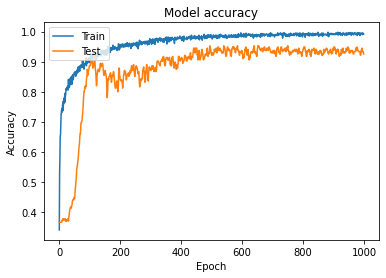

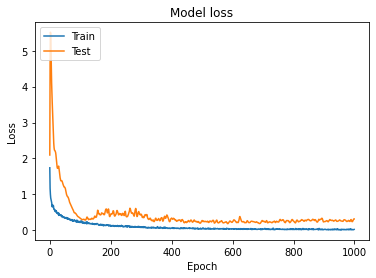

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
# plt.ylim([0.90,1.00])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
#plt.ylim([0,0.3])
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [75]:
loss, accuracy_d = model.evaluate(X_test, y_test, verbose=0)
print("Untrained model, accuracy: {:5.2f}%".format(100 * accuracy_d))

Untrained model, accuracy: 94.92%


In [76]:
model.load_weights("saved_models/audio_classification.hdf5")
# model.load_weights("models/87.5%.hdf5")

loss, accuracy_d = model.evaluate(X_test, y_test, verbose=0)
print("Restored model, accuracy: {:5.2f}%".format(100 * accuracy_d))

Restored model, accuracy: 94.92%


In [77]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.94921875


In [78]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

8/8 [==============================] - 0s 1ms/step


In [79]:
predict_x

array([[6.88122545e-11, 1.91411573e-07, 9.99999762e-01],
       [2.04575237e-08, 1.49843981e-04, 9.99850154e-01],
       [2.91332963e-05, 1.58108488e-01, 8.41862381e-01],
       [6.32802352e-11, 1.90361243e-05, 9.99980927e-01],
       [9.99921322e-01, 5.89535666e-05, 1.96791425e-05],
       [9.99933600e-01, 6.63893588e-05, 3.49456002e-08],
       [6.40087637e-06, 1.49782587e-04, 9.99843836e-01],
       [5.31314989e-04, 9.99463618e-01, 5.16938553e-06],
       [8.21718771e-04, 9.99170899e-01, 7.41340091e-06],
       [1.09753478e-06, 1.35662413e-05, 9.99985337e-01],
       [1.02893216e-06, 9.99946713e-01, 5.21665279e-05],
       [2.96515958e-12, 1.72329429e-10, 1.00000000e+00],
       [9.99841571e-01, 1.58346054e-04, 4.00742284e-09],
       [7.63868153e-01, 2.35919446e-01, 2.12411716e-04],
       [3.64136673e-03, 8.99448097e-01, 9.69104990e-02],
       [9.99998927e-01, 1.12875944e-06, 5.68941283e-10],
       [6.67077402e-05, 1.46196738e-01, 8.53736579e-01],
       [9.99999881e-01, 6.54682

In [80]:
classes_x

array([2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0,
       1, 1, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 1, 2, 0, 0, 2, 0,
       1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 1, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0,
       2, 0, 0, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 1,
       2, 0, 2, 1, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 0, 1,
       0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 0, 0, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 2, 0,
       2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2,
       2, 0, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1, 1, 0, 0, 2, 1, 0,
       1, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 2, 1], dtype=int64)

In [81]:
filename="French Test Samples/taxi1.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
classes_x=np.argmax(predicted_label,axis=1)
prediction_class = labelencoder.inverse_transform(classes_x)
prediction_class

[-276.71732     120.77368       5.3305125    12.242447      7.849333
    9.689318    -11.070928      0.8515188   -20.797642     -8.653248
  -20.327917     -5.4479346   -17.915602    -12.043211    -11.097097
   -4.9122553   -13.986245     -8.010093     -5.505586    -10.373336
   -9.947507     -3.750445     -6.268835     -4.365143     -4.7077484
   -4.1258574    -3.5765269    -2.942056     -4.426134     -2.3961754
   -3.9006197    -2.4674652    -3.299541     -1.065356     -0.4790721
   -2.59775      -0.8374773    -0.66110253   -1.5745608     1.4437628 ]
[[-276.71732     120.77368       5.3305125    12.242447      7.849333
     9.689318    -11.070928      0.8515188   -20.797642     -8.653248
   -20.327917     -5.4479346   -17.915602    -12.043211    -11.097097
    -4.9122553   -13.986245     -8.010093     -5.505586    -10.373336
    -9.947507     -3.750445     -6.268835     -4.365143     -4.7077484
    -4.1258574    -3.5765269    -2.942056     -4.426134     -2.3961754
    -3.9006197    -2

array(['Sadness'], dtype='<U9')

In [46]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1
